In [2]:
import numpy as np
import pandas as pd
import theano
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pickle

colors = get_cmap('Set1').colors

In [3]:
df2 = pd.DataFrame(columns=['iteration', 'valid_MNL', 'valid_MLP2', 'valid_MLP4', 'valid_MLP8', 'valid_MLP16'])

filename = 'MNL0_bestmodel.pkl'

with open(filename, 'rb') as f:
    data = pickle.load(f)
    
model, config, model_stat = data

df = model_stat['training_frame']
df2['valid_MNL'] = df['valid_ll']
df2['train_MNL'] = df['train_ll']
df2['err_MNL'] = df['valid_err']
# df2['errt_MNL'] = df['train_err']

filenames = ['MLP2', 'MLP4', 'MLP8', 'MLP16', 'ResNet2', 'ResNet4', 'ResNet8', 'ResNet16']

for filename in filenames:
    print(str(filename)+'_bestmodel.pkl')
    with open(filename+'_bestmodel.pkl', 'rb') as f:
        data = pickle.load(f)
        if len(data) == 3:
            model, config, model_stat = data
        df = model_stat['training_frame']
        df2['valid_'+filename] = df['valid_ll']
        df2['train_'+filename] = df['train_ll']
        df2['err_'+filename] = df['valid_err']
        # df2['errt_'+filename] = df['train_err']

MLP2_bestmodel.pkl
MLP4_bestmodel.pkl
MLP8_bestmodel.pkl
MLP16_bestmodel.pkl
ResNet2_bestmodel.pkl
ResNet4_bestmodel.pkl
ResNet8_bestmodel.pkl
ResNet16_bestmodel.pkl


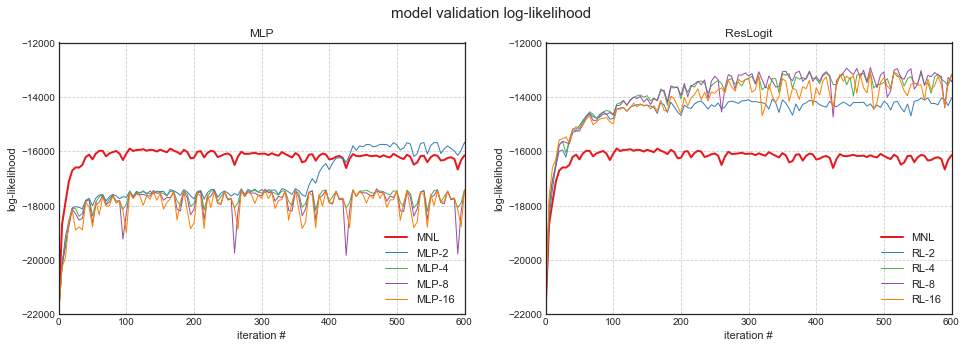

In [6]:
mpl.style.use('seaborn-white')

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 5))
n=5
frame = df2.iloc[(df2.index %n == 0),:]
x = np.arange(len(frame))
axes[0].plot(x*n, -frame.loc[:,'valid_MNL'], ls='-', color=colors[0], label='MNL', lw=2)
# ax2 = axes[0].twinx()
# ax2.plot(x, -frame.loc[:,'train_MNL'], ls='-', alpha=0.5, color=colors[0], label='MNL train', lw=3)
axes[0].plot(x*n, -frame.loc[:,'valid_MLP2'], ls='-', color=colors[1], label='MLP-2', lw=1)
axes[0].plot(x*n, -frame.loc[:,'valid_MLP4'], ls='-', color=colors[2], label='MLP-4', lw=1)
axes[0].plot(x*n, -frame.loc[:,'valid_MLP8'], ls='-', color=colors[3], label='MLP-8', lw=1)
axes[0].plot(x*n, -frame.loc[:,'valid_MLP16'], ls='-', color=colors[4], label='MLP-16', lw=1)
axes[1].plot(x*n, -frame.loc[:,'valid_MNL'], ls='-', color=colors[0], label='MNL', lw=2)
axes[1].plot(x*n, -frame.loc[:,'valid_ResNet2'], ls='-', color=colors[1], label='RL-2', lw=1)
axes[1].plot(x*n, -frame.loc[:,'valid_ResNet4'], ls='-', color=colors[2], label='RL-4', lw=1)
axes[1].plot(x*n, -frame.loc[:,'valid_ResNet8'], ls='-', color=colors[3], label='RL-8', lw=1)
axes[1].plot(x*n, -frame.loc[:,'valid_ResNet16'], ls='-', color=colors[4], label='RL-16', lw=1)

axes[0].set_xlabel('iteration #', fontsize=11)
axes[0].set_ylabel('log-likelihood', fontsize=11)
axes[0].legend(ncol=1, loc='lower right', fontsize=11)
axes[0].grid(ls='--')
axes[0].set_ylim(-22000,-12000)
# ax2.set_ylim(-60000, -1200)
axes[0].set_xlim(0, 600)

axes[1].set_xlabel('iteration #', fontsize=11)
axes[1].set_ylabel('log-likelihood', fontsize=11)
axes[1].legend(ncol=1, loc='lower right', fontsize=11)
axes[1].grid(ls='--')
axes[1].set_ylim(-22000,-12000)
axes[1].set_xlim(0, 600)

axes[0].set_title('MLP')
axes[1].set_title('ResLogit')

fig.suptitle('model validation log-likelihood',size=15)
fig.savefig('images/validation_curves_highdpi.jpg', format='png', dpi=300, bbox_inches='tight')
fig.savefig('images/validation_curves_highdpi.pdf', format='pdf', dpi=300, bbox_inches='tight')

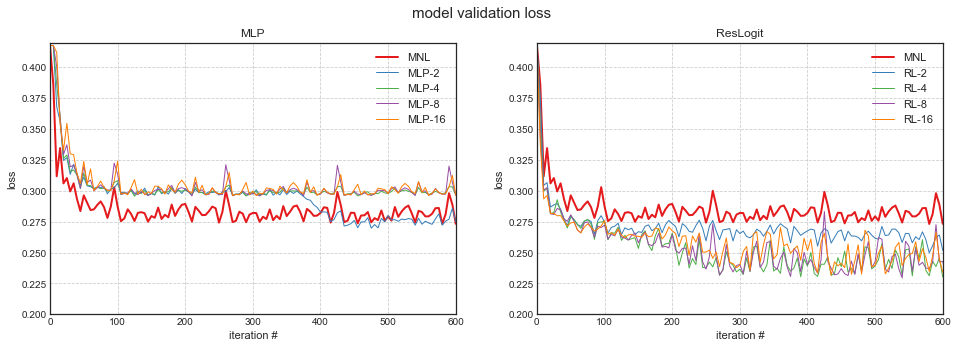

In [7]:
mpl.style.use('seaborn-white')

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 5))
n=5
frame = df2.iloc[(df2.index %n == 0),:]
x = np.arange(len(frame))
axes[0].plot(x*n, frame.loc[:,'err_MNL'], ls='-', color=colors[0], label='MNL', lw=2)
# ax2 = axes[0].twinx()
# ax2.plot(x*n, frame.loc[:,'errt_MNL'], ls='-', alpha=0.5, color=colors[0], label='MNL train', lw=1)
axes[0].plot(x*n, frame.loc[:,'err_MLP2'], ls='-', color=colors[1], label='MLP-2', lw=1)
axes[0].plot(x*n, frame.loc[:,'err_MLP4'], ls='-', color=colors[2], label='MLP-4', lw=1)
axes[0].plot(x*n, frame.loc[:,'err_MLP8'], ls='-', color=colors[3], label='MLP-8', lw=1)
axes[0].plot(x*n, frame.loc[:,'err_MLP16'], ls='-', color=colors[4], label='MLP-16', lw=1)
axes[1].plot(x*n, frame.loc[:,'err_MNL'], ls='-', color=colors[0], label='MNL', lw=2)
axes[1].plot(x*n, frame.loc[:,'err_ResNet2'], ls='-', color=colors[1], label='RL-2', lw=1)
axes[1].plot(x*n, frame.loc[:,'err_ResNet4'], ls='-', color=colors[2], label='RL-4', lw=1)
axes[1].plot(x*n, frame.loc[:,'err_ResNet8'], ls='-', color=colors[3], label='RL-8', lw=1)
axes[1].plot(x*n, frame.loc[:,'err_ResNet16'], ls='-', color=colors[4], label='RL-16', lw=1)

axes[0].set_xlabel('iteration #', fontsize=11)
axes[0].set_ylabel('loss', fontsize=11)
axes[0].legend(ncol=1, loc='upper right', fontsize=11)
axes[0].grid(ls='--')
axes[0].set_ylim(0.2,0.42)
# ax2.set_ylim(0.2,0.4)
axes[0].set_xlim(0, 600)

axes[1].set_xlabel('iteration #', fontsize=11)
axes[1].set_ylabel('loss', fontsize=11)
axes[1].legend(ncol=1, loc='upper right', fontsize=11)
axes[1].grid(ls='--')
axes[1].set_ylim(0.2,0.42)
axes[1].set_xlim(0, 600)

axes[0].set_title('MLP')
axes[1].set_title('ResLogit')

fig.suptitle('model validation loss', size=15)
fig.savefig('images/loss_curves_highdpi.jpg', format='png', dpi=300, bbox_inches='tight')
fig.savefig('images/loss_curves_highdpi.pdf', format='pdf', dpi=300, bbox_inches='tight')